In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [3]:
import pandas as pd
import os

print(os.getcwd())
# Combine features and target into a single DataFrame
data = pd.concat([X, y], axis=1)

# Export the combined DataFrame to a CSV file
data.to_csv('heart_disease_data.csv', index=False)
# Display first few rows and general info
print(data.head())
print(data.info())

/Users/jalen/Documents/code/24Fall_CSCI6806_Group10/models
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  num  
0  0.0   6.0    0  
1  3.0   3.0    2  
2  2.0   7.0    1  
3  0.0   3.0    0  
4  0.0   3.0    0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int

## Step 2: Preprocessing
Make sure to handle any missing values, encode categorical features, and standardize or normalize features if necessary.

In [11]:
# Check for missing values
print(data.isnull().sum())

# Assume there are no missing values or handle accordingly
# Perform encoding and scaling if needed
from sklearn.preprocessing import StandardScaler

# Let's assume there are no categorical variables for simplicity here
features = data.drop(columns=['num'])
target = data['num']


# Fill missing values (mean strategy)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_imputed)


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


## Step 3: Train-Test Split
Split the dataset into training and testing sets.

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.3, random_state=42)




## Step 4: SVM to Find Relations
You can use SVM to find the relationship by training it to predict the num value from other features.

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Initialize the SVM classifier
svm_model = SVC(kernel='linear')  # You can try different kernels like 'rbf'

# Train the model
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.92      0.85        48
           1       0.50      0.35      0.41        17
           2       0.25      0.25      0.25        12
           3       0.27      0.30      0.29        10
           4       0.00      0.00      0.00         4

    accuracy                           0.62        91
   macro avg       0.36      0.36      0.36        91
weighted avg       0.58      0.62      0.59        91

SVM Accuracy: 0.6153846153846154


## Step5 XGBoost to Find Relations
XGBoost can also be used to establish the relationship by fitting a model and examining feature importance.

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        48
           1       0.07      0.06      0.06        17
           2       0.11      0.08      0.10        12
           3       0.13      0.20      0.16        10
           4       0.00      0.00      0.00         4

    accuracy                           0.51        91
   macro avg       0.22      0.24      0.23        91
weighted avg       0.47      0.51      0.49        91



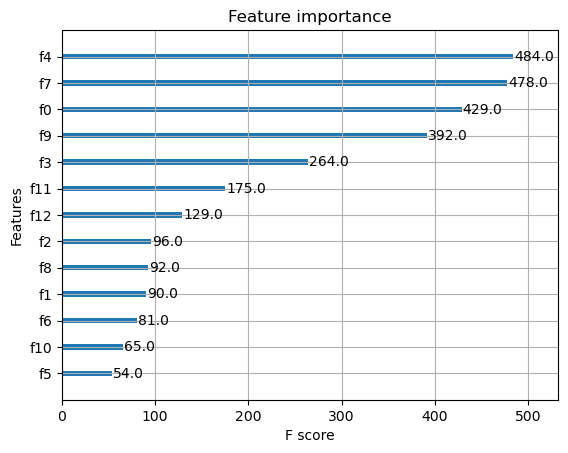

In [19]:
from xgboost import XGBClassifier, plot_importance
import matplotlib.pyplot as plt

# Initialize the XGBoost classifier
xgb_model = XGBClassifier()

# Train the model
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Plotting Feature Importance
plot_importance(xgb_model)
plt.show()


## Add oversampling
Balance the Data: Use oversampling (e.g., SMOTE) or undersampling techniques to handle class imbalance.

In [20]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


              precision    recall  f1-score   support

           0       0.87      0.83      0.85        48
           1       0.28      0.29      0.29        17
           2       0.12      0.08      0.10        12
           3       0.35      0.60      0.44        10
           4       0.00      0.00      0.00         4

    accuracy                           0.57        91
   macro avg       0.33      0.36      0.34        91
weighted avg       0.57      0.57      0.56        91



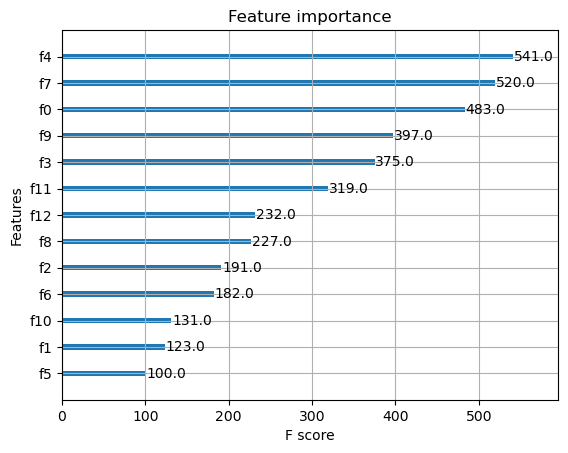

In [21]:
from xgboost import XGBClassifier, plot_importance

xgb_model = XGBClassifier()
xgb_model.fit(X_train_resampled, y_train_resampled)
y_pred_xgb = xgb_model.predict(X_test)

# 评估模型
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_xgb))

# Plotting Feature Importance
plot_importance(xgb_model)
plt.show()



## Hyperparameter Tuning
djusting hyperparameters (e.g., SVM kernel types and regularization parameters) to improve model performance. Use GridSearchCV for hyperparameter optimization.

In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train_resampled, y_train_resampled)

# Predict with the best parameters
y_pred_grid = grid.predict(X_test)
print(classification_report(y_test, y_pred_grid))


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, ke

/opt/miniconda3/envs/myenvironment/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/myenvironment/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/myenvironment/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()